# Pryngles module: optics

Template of a module

## External modules

In [1]:
#@external
from pryngles import *
#@end:external

In [2]:
Scatterer_doc="""This is the basic class of a scatterer
"""

## Class: Scatterer

In [3]:
#@class
class Scatterer(PrynglesCommon):
    def __init__(self,system):
        self.sys = system
        self.test = True
        
    def compute_angles(self):
        """
        """
        for bhash,body in self.sys.bodies.items():
            if body.kind == "Planet":
                center = body.center_ecl
                        
        azim,incli = Science.spherical(self.sys.n_obs)[1:]
        Rx = self.rotation_matrix_x(np.pi/2-incli)
        Rz = self.rotation_matrix_z(np.pi/2-azim)
        
        luz_equ = spy.unorm(center-self.sys.center_source)[0]
        luz_obs = np.matmul(Rx, np.matmul(Rz, luz_equ))
        
        self.phase_angle = np.dot(luz_obs,np.array([0,0,1]))
        
        for bhash,body in self.sys.bodies.items():
            
            if body.kind == "Star":
                verbose(VERB_SIMPLE,f"Body is a star... skipping")
                continue
                
            elif body.kind == "Planet":
                self.etaps = body.sg.data.cos_luz
                self.zetaps = body.sg.data.cos_obs
                t1 = self.phase_angle - self.zetaps*self.etaps
                t2 = np.sin(np.arccos(self.etaps))*np.sin(np.arccos(self.zetaps))
                t3 = t1/t2
                t3[t3 > 1] = 1.0
                t3[t3 < -1] = -1.0
                self.phidiffps = np.pi - np.arccos(t3)
                self.phidiffps[abs(t2) <= 1e-9] = 0.0 
                self.phidiffps[body.sg.data.y_obs < 0] *= -1
                
            elif body.kind == "Ring":
                self.etars = body.sg.data.cos_luz
                self.zetars = body.sg.data.cos_obs
                t1 = self.phase_angle - self.zetars*self.etars
                t2 = np.sin(np.arccos(self.etars))*np.sin(np.arccos(self.zetars))
                t3 = t1/t2
                t3[t3 > 1] = 1.0
                t3[t3 < -1] = -1.0
                self.phidiffrs = np.pi - np.arccos(t3)
                self.phidiffrs[abs(t2) <= 1e-9] = 0.0 
                
            else: 
                continue

    
    def rotation_matrix_x(self,angle):
        Rm = np.array([[1,0,0],[0,np.cos(angle), np.sin(angle)],[0,-np.sin(angle),np.cos(angle)]])
        return Rm
    
    def rotation_matrix_z(self,angle):
        Rm = np.array([[np.cos(angle), -np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])
        return Rm
        
        
Scatterer.__doc__=Scatterer_doc
#@end:class

<IPython.core.display.Javascript object>


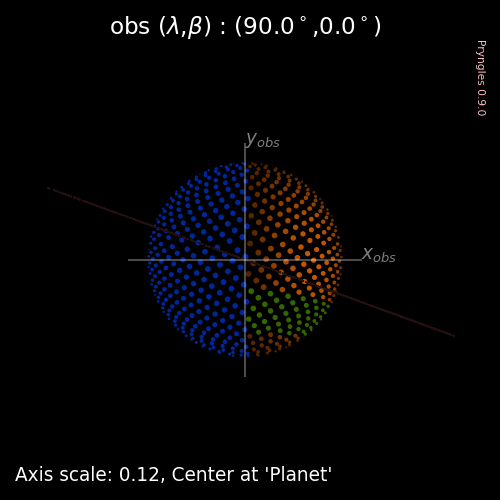

In [4]:
sys=System()
S=sys.add()
P=sys.add("Planet",primary=S,radius=0.1,a=3)
R=sys.add("Ring",primary=P,
          fi=1.3,fe=2.3,
          i=-20*Consts.deg,roll=0*Consts.deg)
sys.initialize_simulation()
sys.spangle_system()
incli = 0
azim = 90
sys.update_perspective(n_obs=Science.direction(azim,incli))
sys.sg.plot2d(include=["Planet","Ring"],show_azim=False);

[6.123234e-17 1.000000e+00 0.000000e+00]


<IPython.core.display.Javascript object>


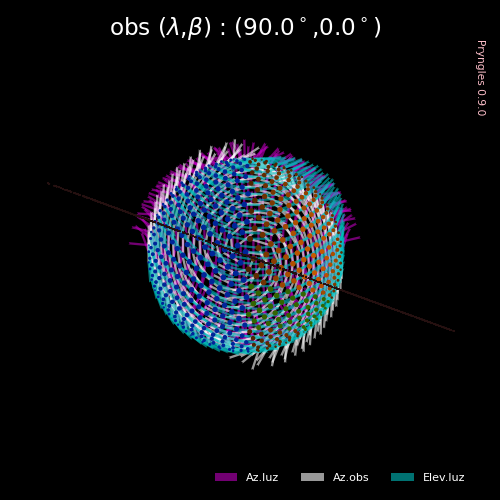

(-1.5000009537727976, -0.00021995947315096279)

In [19]:
incli = 0
azim = 90
print(Science.direction(azim,incli))
sys.update_perspective(n_obs=Science.direction(azim,incli))
sys.sg.plot2d(include=["Planet","Ring"],show_azim=True)

In [17]:
for bhash,body in sys.bodies.items():
#     print(bhash,body)
    if body.kind != "Star":
        print(body.kind)
        print(np.min(body.sg.data.azim_luz),np.mean(body.sg.data.azim_luz),np.max(body.sg.data.azim_luz))
        print(np.min(body.sg.data.azim_obs),np.mean(body.sg.data.azim_obs),np.max(body.sg.data.azim_obs))

# print(sys.sg.data.azim_luz)
# print(sys.sg.data.azim_obs)

Planet
3.141592653589793 3.1415926535897936 3.141592653589793
3.141592653589793 3.1415926535897936 3.141592653589793
Ring
3.141592653589793 3.1415926535897936 3.141592653589793
3.141592653589793 3.1415926535897936 3.141592653589793


In [7]:
test = Scatterer(sys)
test.compute_angles()
# print(sys.data)
print(test.sys.center_source)
print(np.arccos(test.phase_angle)*180/np.pi)
print(np.arccos(test.etars)*180/np.pi)
print(np.arccos(test.zetars)*180/np.pi)
print(np.arccos(test.etaps)*180/np.pi)
print(np.arccos(test.zetaps)*180/np.pi)
print(np.min(test.phidiffps*180/np.pi),np.max(test.phidiffps*180/np.pi))
print(np.min(test.phidiffrs*180/np.pi),np.max(test.phidiffrs*180/np.pi))

[-1.5  0.   0. ]
80.0
0       20.0
1       20.0
2       20.0
3       20.0
4       20.0
        ... 
1053    20.0
1054    20.0
1055    20.0
1056    20.0
1057    20.0
Name: cos_luz, Length: 1058, dtype: float64
0       20.0
1       20.0
2       20.0
3       20.0
4       20.0
        ... 
1053    20.0
1054    20.0
1055    20.0
1056    20.0
1057    20.0
Name: cos_obs, Length: 1058, dtype: float64
0      177.437441
1      175.560778
2      174.268032
3      173.216711
4      172.307188
          ...    
982      7.692812
983      6.783289
984      5.731968
985      4.439222
986      2.562559
Name: cos_luz, Length: 987, dtype: float64
0      177.437441
1      175.560778
2      174.268032
3      173.216711
4      172.307188
          ...    
982      7.692812
983      6.783289
984      5.731968
985      4.439222
986      2.562559
Name: cos_obs, Length: 987, dtype: float64
-99.99995192308802 99.99995192308802
0.0 0.0


In [ ]:
#@test:optics
def test_scatterer(self):

    Verbose.VERBOSITY=VERB_ALL

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_scatterer=test_scatterer
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

### The end

In [ ]:
#@end:module

## Playing ground